In [ ]:
#Importing libraries
import pandas as pd

In [ ]:
#Importing crime data and opening the weather data file:
!wget https://data.buffalony.gov/api/views/d6g9-xbgu/rows.csv?accessType=DOWNLOAD;
weather_df = pd.read_csv('/content/2438823.csv')
weather_df['DATE']=pd.to_datetime(weather_df['DATE'])

In [ ]:
#Showing the first 5 rows of the weather data file:
weather_df.head()

,STATION,NAME,DATE,PRCP,SNWD,TAVG,TMAX,TMIN
0,USC00301011,"BUFFALO 4 NE, NY US",2017-01-01,0.01,0.0,NaN,NaN,NaN
1,USC00301011,"BUFFALO 4 NE, NY US",2017-01-02,0.00,0.0,NaN,NaN,NaN
2,USC00301011,"BUFFALO 4 NE, NY US",2017-01-03,0.00,0.0,NaN,NaN,NaN
3,USC00301011,"BUFFALO 4 NE, NY US",2017-01-04,0.65,0.0,NaN,NaN,NaN
4,USC00301011,"BUFFALO 4 NE, NY US",2017-01-05,0.00,0.0,NaN,NaN,NaN


In [ ]:
#Opening the crime data file and showing the first 5 rows:
crime_df = pd.read_csv('/content/rows.csv?accessType=DOWNLOAD')
crime_df.head()

,incident_id,case_number,incident_datetime,incident_type_primary,incident_description,clearance_type,address_1,address_2,city,state,zip,country,latitude,longitude,created_at,updated_at,location,hour_of_day,day_of_week,parent_incident_type,Census Tract 1,Census Block 1,Census Block Group 1,Neighborhood 1,Police District 1,Council District 1,date
0,951642799.0,20-0050070,01/05/2020 01:30:00 AM,LARCENY/THEFT,Buffalo Police are investigating this report o...,NaN,200 Block ONEIDA AV,NaN,Buffalo,NY,NaN,NaN,42.876,-78.843,01/05/2020 02:00:54 AM,01/17/2020 11:49:44 PM,POINT (-78.843 42.876),2,SUNDAY,Theft,163,1005,1,Seneca Babcock,District A,FILLMORE,2020-01-05
1,951660739.0,20-0050096,01/05/2020 02:07:00 AM,MURDER,Buffalo Police are investigating this report o...,NaN,PADEREWSKI DR & SHUMWAY ST,NaN,Buffalo,NY,NaN,NaN,42.890,-78.845,01/05/2020 02:07:22 AM,01/17/2020 11:49:44 PM,POINT (-78.845 42.89),2,SUNDAY,Homicide,15,2021,2,Broadway Fillmore,District C,FILLMORE,2020-01-05
2,951639680.0,20-0050120,01/04/2020 11:00:48 PM,ASSAULT,Buffalo Police are investigating this report o...,NaN,400 Block GRIDER ST,NaN,Buffalo,NY,NaN,NaN,42.918,-78.829,01/05/2020 02:40:48 AM,01/17/2020 11:49:45 PM,POINT (-78.829 42.918),2,SUNDAY,Assault,34,5019,5,Delavan Grider,District E,MASTEN,2020-01-04
3,952253766.0,20-0120068,01/12/2020 01:39:00 AM,ASSAULT,Buffalo Police are investigating this report o...,NaN,600 Block HOPKINS ST,NaN,Buffalo,NY,NaN,NaN,42.857,-78.833,01/12/2020 02:32:18 AM,01/17/2020 11:49:43 PM,POINT (-78.833 42.857),2,SUNDAY,Assault,1.10,3031,3,Hopkins-Tifft,District A,SOUTH,2020-01-12
4,NaN,20-0050162,01/05/2020 04:00:00 AM,ASSAULT,Buffalo Police are investigating this report o...,NaN,0 Block POPLAR AV,NaN,Buffalo,NY,NaN,NaN,42.907,-78.805,01/05/2020 04:02:56 AM,NaN,POINT (-78.805 42.907),4,SUNDAY,Assault,30,2003,2,Schiller Park,District C,LOVEJOY,2020-01-05


In [ ]:
#Extracting the dates and the number of crimes per day :
crime_df['date']=pd.to_datetime(crime_df['incident_datetime']).dt.floor('d')
crime_counts = crime_df['date'].value_counts().reset_index()
crime_counts.columns=['date','count']
crime_counts.head()

,date,count
0,2010-01-01,117
1,2007-01-01,115
2,2012-01-01,109
3,2006-07-01,107
4,2008-07-01,102


In [ ]:
# Merging the weather data with counts of crime per day :
total_counts=pd.merge(weather_df,crime_counts, left_on='DATE', right_on='date', how='inner')
total_counts.drop(['STATION','NAME','date'],axis=1,inplace=True)
combined_total=total_counts.groupby('DATE').mean()
combined_total['TAVG']=(combined_total['TMAX']+combined_total['TMIN'])/2

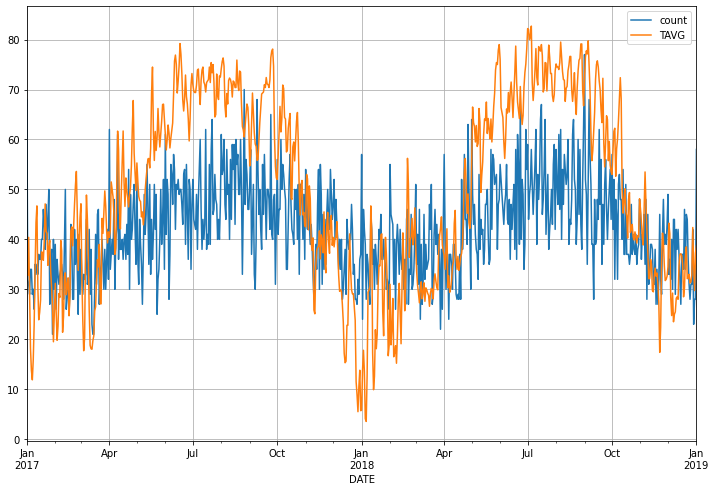

In [ ]:
#Plotting count against average temperature:
combined_total[['count','TAVG']].plot(figsize=(12,8),grid=True);

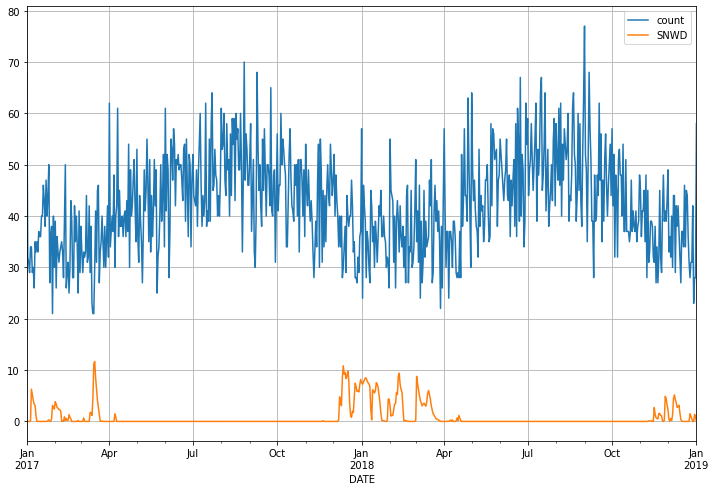

In [ ]:
#Plotting snowfall against average temperature:
combined_total[['count','SNWD']].plot(figsize=(12,8),grid=True);

In [ ]:
#Showing the correlations between all the variables :
combined_total.corr()

,PRCP,SNWD,TAVG,TMAX,TMIN,count
PRCP,1.000000,-0.036371,0.028857,-0.005895,0.067776,-0.079710
SNWD,-0.036371,1.000000,-0.582446,-0.575242,-0.576639,-0.302305
TAVG,0.028857,-0.582446,1.000000,0.990140,0.987170,0.579114
TMAX,-0.005895,-0.575242,0.990140,1.000000,0.955071,0.582230
TMIN,0.067776,-0.576639,0.987170,0.955071,1.000000,0.561624
count,-0.079710,-0.302305,0.579114,0.582230,0.561624,1.000000


In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html /content/crime.ipynb

[NbConvertApp] Converting notebook /content/crime.ipynb to html
[NbConvertApp] Writing 557559 bytes to /content/crime.html
